## Data Demo

### Imports

In [1]:
from imports import *

2024-09-16 17:22:59.828899: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-16 17:23:02.313570: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-16 17:23:05.431375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from models import *
from data import * 
from env import *
from harmonize import *
from metrics import * 
from sim import *

In [3]:
# overall imports
import importlib
import data

# data load
#importlib.reload(data.data_load)
#importlib.reload(data.data_viz)

from data.data_load import load_transcriptome, load_connectome
from data.data_viz import plot_connectome, plot_connectome_with_labels, plot_transcriptome
importlib.reload(data.data_load)
importlib.reload(data.data_viz)

# data utils
from data.data_utils import (
    reconstruct_connectome,
    reconstruct_upper_triangle,
    make_symmetric,
    expand_X_symmetric,
    expand_Y_symmetric,
    expand_X_symmetric_shared,
    expand_X_Y_symmetric_conn_only,
    expand_shared_matrices,
    expand_X_symmetric_w_conn, 
    process_cv_splits, 
    process_cv_splits_conn_only_model, 
    expanded_inner_folds_combined_plus_indices
)

import data.data_utils
importlib.reload(data.data_utils)

# cross-validation classes
import data.cv_split
from data.cv_split import RandomCVSplit, SchaeferCVSplit, CommunityCVSplit, SubnetworkCVSplit
importlib.reload(data.cv_split)

# prebuilt model classes
import models.prebuilt_models
from models.prebuilt_models import ModelBuild
importlib.reload(models.prebuilt_models)

# metric classes
import metrics.distance_FC
import metrics.eval
from metrics.eval import ModelEvaluator
from metrics.eval import pearson_numpy, mse_numpy, r2_numpy, pearson_cupy, mse_cupy, r2_cupy
importlib.reload(metrics.eval)

# sim class
import sim.sim 
from sim.sim import Simulation
importlib.reload(sim.sim)


<module 'sim.sim' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim.py'>

[Sims](#sims)

### HCP Connectivity Data

(114, 114)


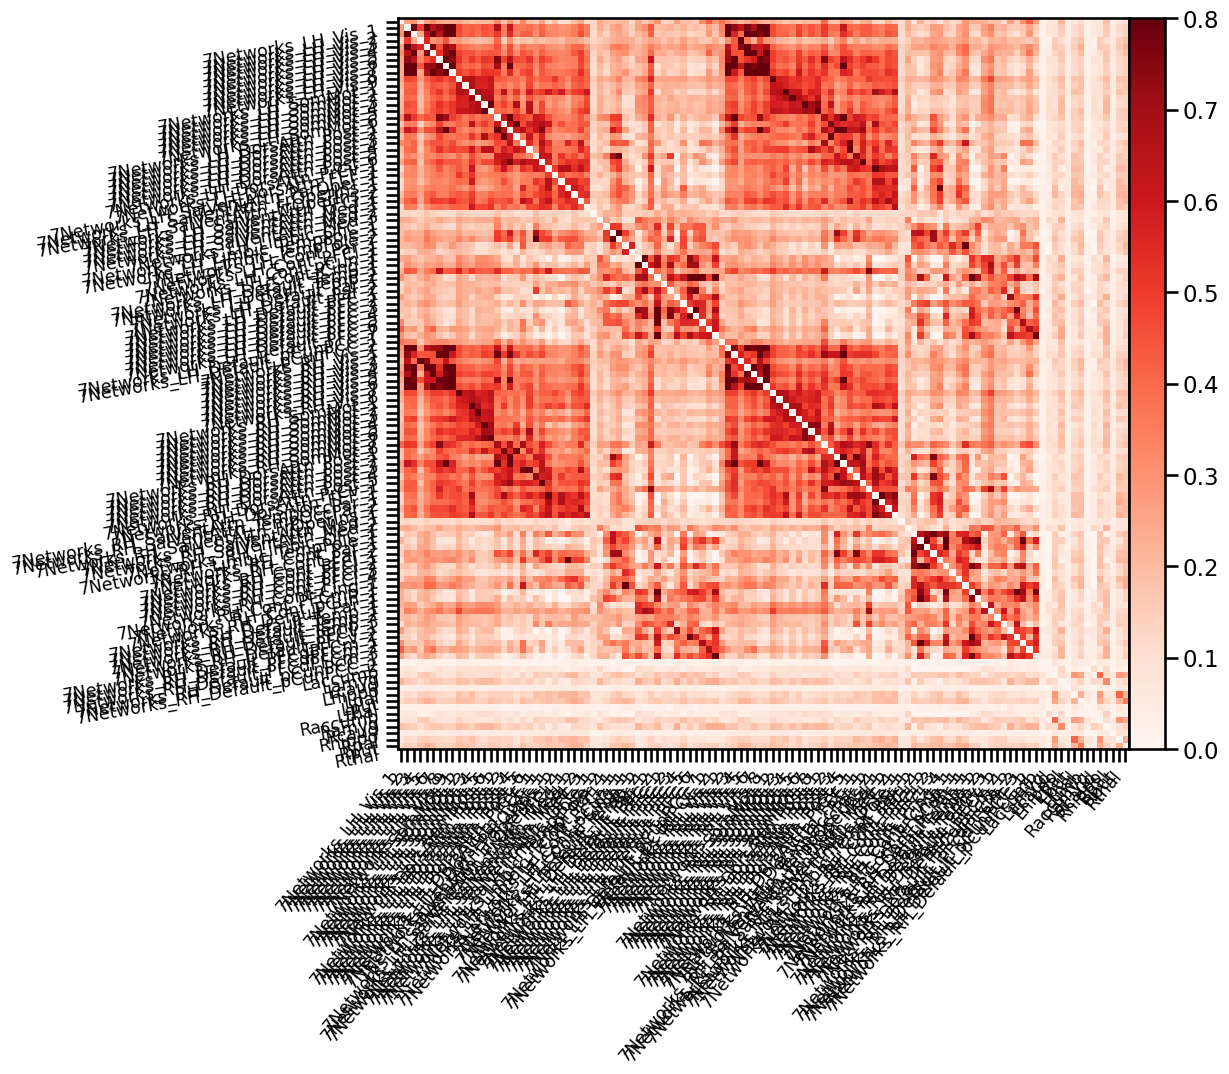

In [4]:
fc_combined_mat_schaef_100, fc_combined_labels_schaef_100 = load_fc_as_one(parcellation='schaefer_100')
print(fc_combined_mat_schaef_100.shape)
fc_all_schaef = plotting.plot_matrix(fc_combined_mat_schaef_100, figure=(9, 9), labels=fc_combined_labels_schaef_100, vmax=0.8, vmin=0, cmap='Reds')

In [5]:
print(fc_combined_labels_schaef_100)
print(fc_combined_mat_schaef_100)
Y = fc_combined_mat_schaef_100

['7Networks_LH_Vis_1' '7Networks_LH_Vis_2' '7Networks_LH_Vis_3'
 '7Networks_LH_Vis_4' '7Networks_LH_Vis_5' '7Networks_LH_Vis_6'
 '7Networks_LH_Vis_7' '7Networks_LH_Vis_8' '7Networks_LH_Vis_9'
 '7Networks_LH_SomMot_1' '7Networks_LH_SomMot_2' '7Networks_LH_SomMot_3'
 '7Networks_LH_SomMot_4' '7Networks_LH_SomMot_5' '7Networks_LH_SomMot_6'
 '7Networks_LH_DorsAttn_Post_1' '7Networks_LH_DorsAttn_Post_2'
 '7Networks_LH_DorsAttn_Post_3' '7Networks_LH_DorsAttn_Post_4'
 '7Networks_LH_DorsAttn_Post_5' '7Networks_LH_DorsAttn_Post_6'
 '7Networks_LH_DorsAttn_PrCv_1' '7Networks_LH_DorsAttn_FEF_1'
 '7Networks_LH_SalVentAttn_ParOper_1'
 '7Networks_LH_SalVentAttn_FrOperIns_1'
 '7Networks_LH_SalVentAttn_FrOperIns_2' '7Networks_LH_SalVentAttn_PFCl_1'
 '7Networks_LH_SalVentAttn_Med_1' '7Networks_LH_SalVentAttn_Med_2'
 '7Networks_LH_SalVentAttn_Med_3' '7Networks_LH_Limbic_OFC_1'
 '7Networks_LH_Limbic_TempPole_1' '7Networks_LH_Limbic_TempPole_2'
 '7Networks_LH_Cont_Par_1' '7Networks_LH_Cont_PFCl_1'
 '7Networ

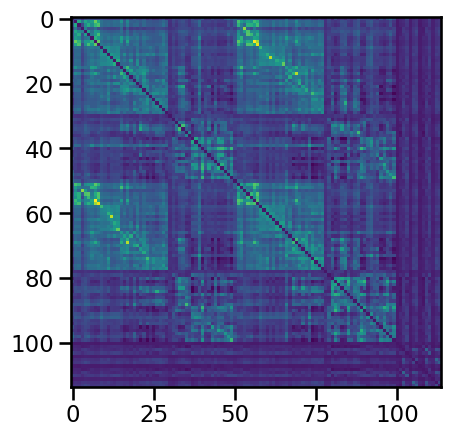

In [6]:
plt.imshow(Y)

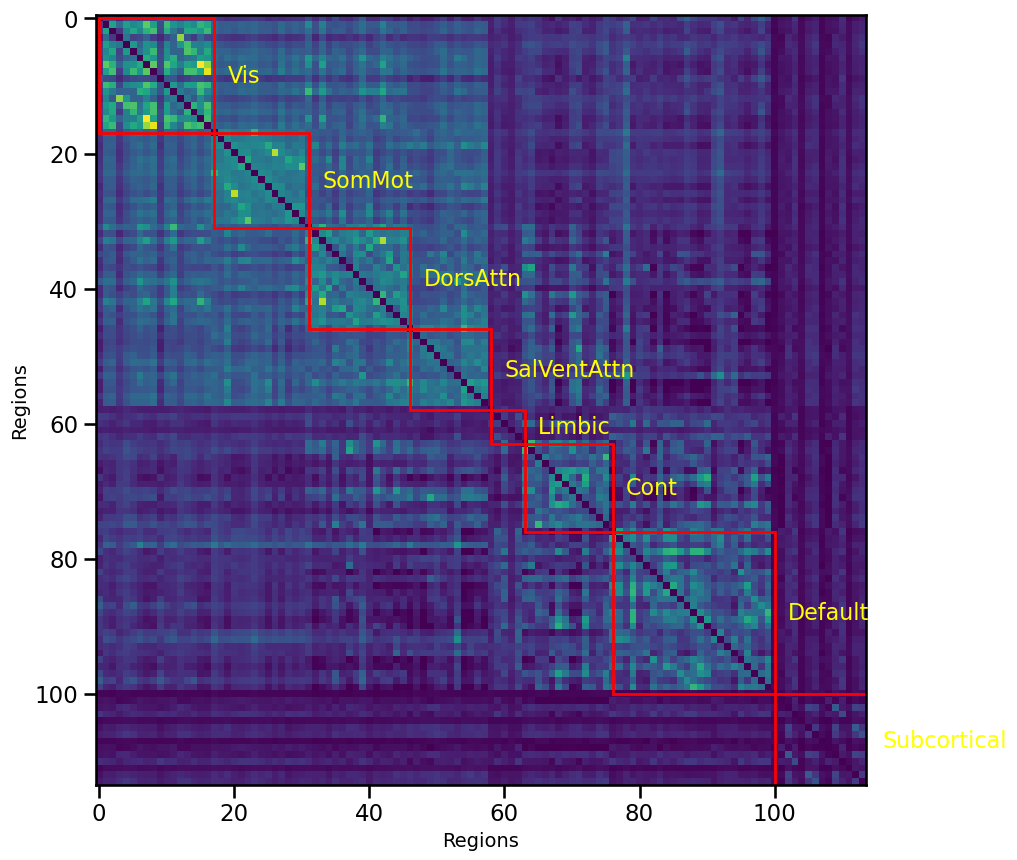

In [7]:
plot_connectome_with_labels(Y, fc_combined_labels_schaef_100)


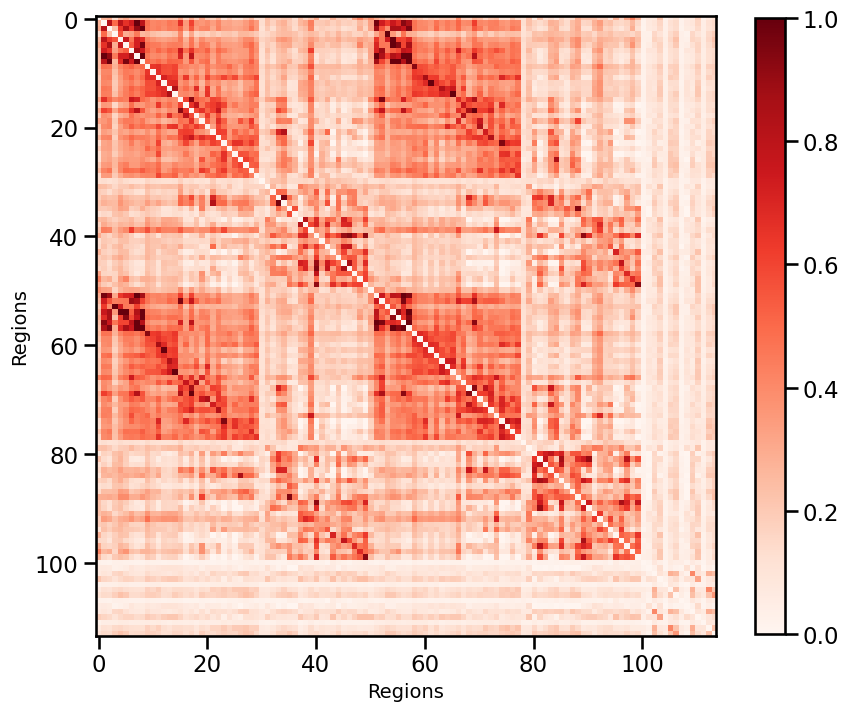

In [8]:
plot_connectome(Y)

#### Test network community detection

Graph with 114 nodes and 6441 edges
[{1, 2, 3, 4, 5, 6, 7, 8, 69, 66, 15, 17, 51, 52, 53, 54, 55, 56, 57}, {64, 65, 67, 9, 10, 11, 12, 13, 14, 18, 20, 101, 108, 58, 59, 60, 61, 62, 63}, {68, 70, 71, 72, 73, 74, 75, 76, 77, 16, 80, 19, 84, 21, 22, 23, 24, 25, 26, 27, 28, 29, 87, 33, 83, 34, 39}, {0, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 78, 79, 81, 82, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113}]


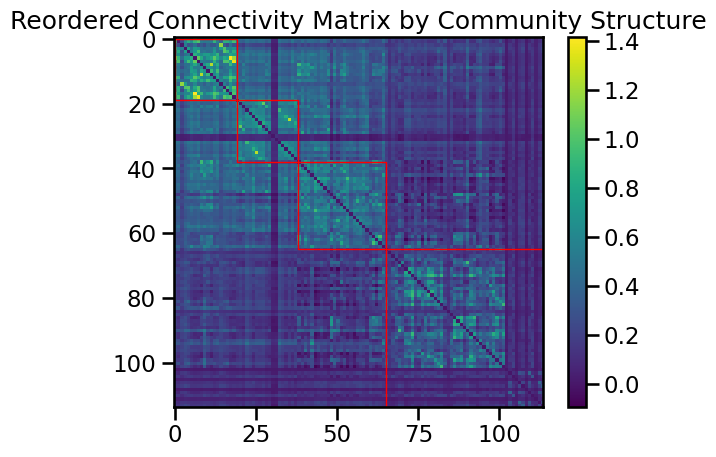

In [51]:
Y = load_connectome()
connectome_net = nx.Graph(incoming_graph_data=Y)
print(connectome_net)

# resolution parameter should be maximized until an inner train is infeasible/impractical to evaluate (1.1 could technically work)
communities = nx.community.louvain_communities(connectome_net, seed=0, resolution=1.0)
print(communities)

# Create a new ordering of nodes based on louvain community detection
new_order = []
for community in communities:
    new_order.extend(community)

# Map the original indices to the new ordering
index_map = {old_idx: new_idx for new_idx, old_idx in enumerate(new_order)}

# Reorder the matrix
Y_reordered = Y[np.ix_(new_order, new_order)]

# Visualize the reordered matrix
fig, ax = plt.subplots()
cax = ax.imshow(Y_reordered, cmap='viridis')

# Add colorbar
plt.colorbar(cax)

# Add red boxes around communities
start = 0
for community in communities:
    size = len(community)
    rect = patches.Rectangle((start, start), size, size, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    start += size

plt.title('Reordered Connectivity Matrix by Community Structure')
plt.show()

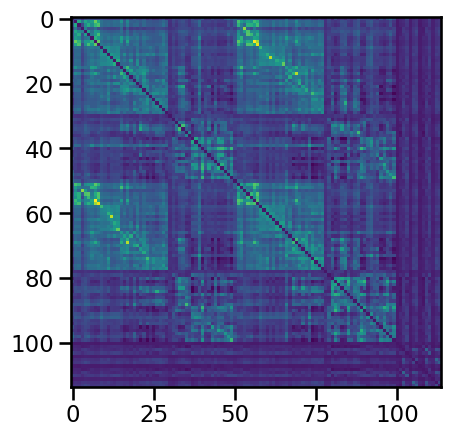

In [12]:
plt.imshow(Y)

### AHBA gene data

In [107]:
genes = fetch_ahba()
genes

,label,A1BG,A1BG-AS1,AAAS,AACS,AADACL3,AADAT,AAED1,AAK1,AAMDC,...,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
0,L_bankssts,0.468854,0.700170,0.505789,0.764127,0.374206,0.658622,0.345665,0.511831,0.424702,...,0.578213,0.539968,0.542518,0.580108,0.436774,0.342712,0.690473,0.700179,0.533907,0.482430
1,L_caudalanteriorcingulate,0.606901,0.560731,0.459692,0.673249,0.424793,0.709927,0.441996,0.366110,0.603905,...,0.736780,0.471864,0.441377,0.406806,0.458666,0.486808,0.624359,0.496063,0.427907,0.510274
2,L_caudalmiddlefrontal,0.512080,0.609772,0.516944,0.791223,0.368258,0.591441,0.440311,0.520090,0.494193,...,0.568923,0.522407,0.595659,0.471493,0.366045,0.356483,0.689424,0.731162,0.367931,0.461228
3,L_cuneus,0.340848,0.570180,0.677448,0.750356,0.442332,0.569819,0.364639,0.666202,0.429725,...,0.328457,0.589241,0.562006,0.451543,0.403732,0.370707,0.646500,0.859074,0.568544,0.369236
4,L_entorhinal,0.663801,0.549562,0.395052,0.721829,0.449548,0.588481,0.576347,0.347882,0.548371,...,0.702060,0.479673,0.546094,0.691197,0.360518,0.526293,0.706851,0.333083,0.345136,0.557094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Rcaud,0.619848,0.318972,0.498983,0.271222,0.555309,0.500222,0.663142,0.330626,0.720306,...,0.812634,0.332516,0.302927,0.370860,0.751410,0.699088,0.275580,0.224110,0.339080,0.420971
78,Rhippo,0.377399,0.274101,0.347923,0.523755,0.718340,0.228699,0.565169,0.739631,0.258704,...,0.328818,0.359226,0.368190,0.651293,0.645399,0.554279,0.376828,0.285925,0.485843,0.412266
79,Rpal,0.800714,0.220463,0.635593,0.197948,0.548496,0.624486,0.664744,0.221901,0.937931,...,0.482249,0.644349,0.273982,0.329791,0.568571,0.801305,0.258434,0.430613,0.565564,0.785757
80,Rput,0.697285,0.447848,0.514870,0.367506,0.406484,0.595085,0.469804,0.212579,0.670761,...,0.794397,0.419572,0.480628,0.464933,0.689909,0.636104,0.320400,0.349777,0.534618,0.601170


In [108]:
X = load_transcriptome()

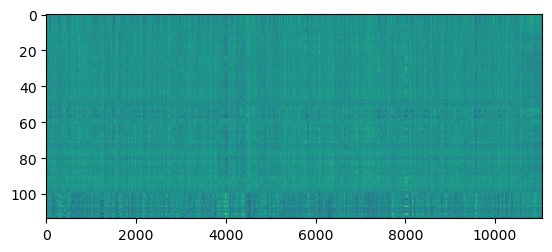

In [109]:
plt.imshow(X, aspect=40)

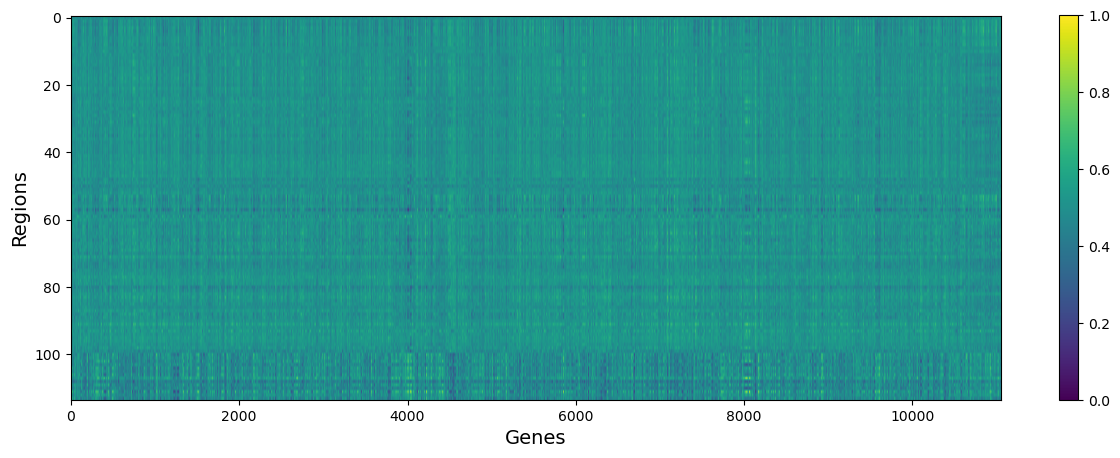

In [110]:
plot_transcriptome(X)

### Assign macro region

In [42]:
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = par_dir + '/data'

print(data_dir)

/scratch/asr655/neuroinformatics/data


In [52]:
hcp_schaef =  pd.read_csv(data_dir + '/atlas_info/schaef114.csv')
hcp_schaef

,Unnamed: 0,label_x,index,label_y,network_label,label_7network,index_17network,label_17network,network_label_17network,atlas_name,network_id,id,hemisphere,structure,mni_x,mni_y,mni_z
0,0,7Networks_LH_Vis_1,1.0,LH_Vis_1,Vis,7Networks_LH_Vis_1,49.0,17Networks_LH_DefaultC_PHC_1,DefaultC,4S156,NaN,1.0,L,cortex,-25.819797,-32.624365,-17.459391
1,1,7Networks_LH_Vis_2,2.0,LH_Vis_2,Vis,7Networks_LH_Vis_2,1.0,17Networks_LH_VisCent_ExStr_1,VisCent,4S156,NaN,2.0,L,cortex,-25.481288,-76.591819,-13.514360
2,2,7Networks_LH_Vis_3,3.0,LH_Vis_3,Vis,7Networks_LH_Vis_3,5.0,17Networks_LH_VisPeri_ExStrInf_1,VisPeri,4S156,NaN,3.0,L,cortex,-16.424947,-60.957717,-6.735729
3,3,7Networks_LH_Vis_4,4.0,LH_Vis_4,Vis,7Networks_LH_Vis_4,2.0,17Networks_LH_VisCent_ExStr_2,VisCent,4S156,NaN,4.0,L,cortex,-27.130818,-94.490566,-4.744654
4,4,7Networks_LH_Vis_5,5.0,LH_Vis_5,Vis,7Networks_LH_Vis_5,3.0,17Networks_LH_VisCent_Striate_1,VisCent,4S156,NaN,5.0,L,cortex,-6.226506,-92.462651,-3.036145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,Rcaud,NaN,NaN,Subcortex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,subcortex,14.720000,7.160000,9.640000
110,110,Rhippo,NaN,NaN,Subcortex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,subcortex,26.370000,-21.140000,-13.890000
111,111,Rpal,NaN,NaN,Subcortex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,subcortex,12.420000,3.790000,-8.420000
112,112,Rput,NaN,NaN,Subcortex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,subcortex,25.880000,1.930000,0.600000


In [ ]:
# assign macro region and fetch euclidean...

In [43]:
schaef_atlas_df = pd.read_csv(data_dir + '/atlas_info/atlas-4S156Parcels_dseg_reformatted.csv')

In [44]:
schaef_atlas_df

,index,label,network_label,label_7network,index_17network,label_17network,network_label_17network,atlas_name,network_id,id,hemisphere,structure,mni_x,mni_y,mni_z
0,1,LH_Vis_1,Vis,7Networks_LH_Vis_1,49.0,17Networks_LH_DefaultC_PHC_1,DefaultC,4S156,NaN,1,L,cortex,-25.819797,-32.624365,-17.459391
1,2,LH_Vis_2,Vis,7Networks_LH_Vis_2,1.0,17Networks_LH_VisCent_ExStr_1,VisCent,4S156,NaN,2,L,cortex,-25.481288,-76.591819,-13.514360
2,3,LH_Vis_3,Vis,7Networks_LH_Vis_3,5.0,17Networks_LH_VisPeri_ExStrInf_1,VisPeri,4S156,NaN,3,L,cortex,-16.424947,-60.957717,-6.735729
3,4,LH_Vis_4,Vis,7Networks_LH_Vis_4,2.0,17Networks_LH_VisCent_ExStr_2,VisCent,4S156,NaN,4,L,cortex,-27.130818,-94.490566,-4.744654
4,5,LH_Vis_5,Vis,7Networks_LH_Vis_5,3.0,17Networks_LH_VisCent_Striate_1,VisCent,4S156,NaN,5,L,cortex,-6.226506,-92.462651,-3.036145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,Cerebellar_Region6,NaN,Cerebellum,NaN,NaN,NaN,Cerebellum,NaN,152,B,subcortex,-37.491409,-54.364261,-30.378007
152,153,Cerebellar_Region7,NaN,Cerebellum,NaN,NaN,NaN,Cerebellum,NaN,153,B,subcortex,-19.201896,-78.735545,-34.915640
153,154,Cerebellar_Region8,NaN,Cerebellum,NaN,NaN,NaN,Cerebellum,NaN,154,B,subcortex,-34.586957,-82.141304,-33.684783
154,155,Cerebellar_Region9,NaN,Cerebellum,NaN,NaN,NaN,Cerebellum,NaN,155,B,subcortex,-46.000000,-53.000000,-56.000000


In [45]:
hcp_schaef = pd.DataFrame(fc_combined_labels_schaef_100, columns=['label')
hcp_schaef

# create a df with these values as label column
# merge in mni_x, mni_y, mni_z for matching labels 

,label
0,7Networks_LH_Vis_1
1,7Networks_LH_Vis_2
2,7Networks_LH_Vis_3
3,7Networks_LH_Vis_4
4,7Networks_LH_Vis_5
...,...
109,Rcaud
110,Rhippo
111,Rpal
112,Rput


In [46]:
# Assuming the two dataframes 'schaef_atlas_df' and 'hcp_schaef' exist
hcp_schaef = pd.merge(hcp_schaef, schaef_atlas_df, left_on='label', right_on='label_7network', how='left')

# Display the first few rows of the merged dataframe
hcp_schaef.head()

,label_x,index,label_y,network_label,label_7network,index_17network,label_17network,network_label_17network,atlas_name,network_id,id,hemisphere,structure,mni_x,mni_y,mni_z
0,7Networks_LH_Vis_1,1.0,LH_Vis_1,Vis,7Networks_LH_Vis_1,49.0,17Networks_LH_DefaultC_PHC_1,DefaultC,4S156,NaN,1.0,L,cortex,-25.819797,-32.624365,-17.459391
1,7Networks_LH_Vis_2,2.0,LH_Vis_2,Vis,7Networks_LH_Vis_2,1.0,17Networks_LH_VisCent_ExStr_1,VisCent,4S156,NaN,2.0,L,cortex,-25.481288,-76.591819,-13.514360
2,7Networks_LH_Vis_3,3.0,LH_Vis_3,Vis,7Networks_LH_Vis_3,5.0,17Networks_LH_VisPeri_ExStrInf_1,VisPeri,4S156,NaN,3.0,L,cortex,-16.424947,-60.957717,-6.735729
3,7Networks_LH_Vis_4,4.0,LH_Vis_4,Vis,7Networks_LH_Vis_4,2.0,17Networks_LH_VisCent_ExStr_2,VisCent,4S156,NaN,4.0,L,cortex,-27.130818,-94.490566,-4.744654
4,7Networks_LH_Vis_5,5.0,LH_Vis_5,Vis,7Networks_LH_Vis_5,3.0,17Networks_LH_VisCent_Striate_1,VisCent,4S156,NaN,5.0,L,cortex,-6.226506,-92.462651,-3.036145


In [48]:
hcp_schaef.head()

,label_x,index,label_y,network_label,label_7network,index_17network,label_17network,network_label_17network,atlas_name,network_id,id,hemisphere,structure,mni_x,mni_y,mni_z
0,7Networks_LH_Vis_1,1.0,LH_Vis_1,Vis,7Networks_LH_Vis_1,49.0,17Networks_LH_DefaultC_PHC_1,DefaultC,4S156,NaN,1.0,L,cortex,-25.819797,-32.624365,-17.459391
1,7Networks_LH_Vis_2,2.0,LH_Vis_2,Vis,7Networks_LH_Vis_2,1.0,17Networks_LH_VisCent_ExStr_1,VisCent,4S156,NaN,2.0,L,cortex,-25.481288,-76.591819,-13.514360
2,7Networks_LH_Vis_3,3.0,LH_Vis_3,Vis,7Networks_LH_Vis_3,5.0,17Networks_LH_VisPeri_ExStrInf_1,VisPeri,4S156,NaN,3.0,L,cortex,-16.424947,-60.957717,-6.735729
3,7Networks_LH_Vis_4,4.0,LH_Vis_4,Vis,7Networks_LH_Vis_4,2.0,17Networks_LH_VisCent_ExStr_2,VisCent,4S156,NaN,4.0,L,cortex,-27.130818,-94.490566,-4.744654
4,7Networks_LH_Vis_5,5.0,LH_Vis_5,Vis,7Networks_LH_Vis_5,3.0,17Networks_LH_VisCent_Striate_1,VisCent,4S156,NaN,5.0,L,cortex,-6.226506,-92.462651,-3.036145


In [49]:
hcp_schaef.tail()

,label_x,index,label_y,network_label,label_7network,index_17network,label_17network,network_label_17network,atlas_name,network_id,id,hemisphere,structure,mni_x,mni_y,mni_z
109,Rcaud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Rhippo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Rpal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,Rput,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,Rthal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
hcp_schaef.to_csv(data_dir + '/atlas_info/schaef114.csv')